# Rastava logo

In [25]:
import cv2

# for running on colab
# from google.colab.patches import cv2_imshow

from matplotlib import pyplot as plt
import seaborn_image as isns

import time

D:\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
LOGO_PATH = 'rastava_logo.png'

In [3]:
logo = cv2.imread(LOGO_PATH, cv2.IMREAD_COLOR)

In [4]:
print(type(logo), logo.shape)
print(logo[:2])

<class 'numpy.ndarray'> (224, 225, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.

In [5]:
# cv2_imshow(logo)
cv2.imshow('Rastava Logo', logo)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
def show_image(title, img):
    # using cv2_imshow(img) on google colab   
    # cv2_imshow(logo)
    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
show_image('Rastava Logo', logo)

## gray scale

In [8]:
grey_logo = cv2.imread(LOGO_PATH, cv2.IMREAD_GRAYSCALE)
# cv2_imshow(logo)
show_image('Rastava Grey Logo', grey_logo)

In [9]:
grey_logo[20:100][60:1500] = 0
show_image('Rastava Grey Logo', grey_logo)

In [10]:
for i in range(0, grey_logo.shape[0]):
    for j in range(0, logo.shape[1]):
        grey_logo[i, j] = 0 if grey_logo[i, j] == 255 else grey_logo[i, j]

show_image('Rastava Grey Logo', grey_logo)

## white and black
convert greyscale image to black and white binary image using a threshold

In [11]:
# Convert grayscale image to binary
BW_THRESHOLD = 128
MAXVAL = 255

def convert_grey_to_bw_img(logo):
  (thresh, im_bw) = cv2.threshold(logo, BW_THRESHOLD, MAXVAL, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  cv2.imwrite('bw_logo.png', im_bw)
  return im_bw

In [12]:
logo = cv2.imread(LOGO_PATH, cv2.IMREAD_GRAYSCALE)
im_bw = convert_grey_to_bw_img(logo)
show_image('Rastava Black and White Image', im_bw)

## Convert colored logo to greyscale logo

In [13]:
def convert_color_to_greyscale_img(logo):
  grey_logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
  return grey_logo

In [14]:
logo = cv2.imread(LOGO_PATH, cv2.IMREAD_COLOR)
grey_logo = convert_color_to_greyscale_img(logo)
show_image('Rastava Grey Logo', grey_logo)

## Convert colored logo to black and white logo

In [15]:
def convert_color_to_bw_img(logo):
  grey_img = convert_color_to_greyscale_img(logo)
  bw_logo = convert_grey_to_bw_img(grey_img)
  return bw_logo

In [16]:
logo = cv2.imread(LOGO_PATH, cv2.IMREAD_COLOR)
bw_logo = convert_color_to_bw_img(logo)
show_image('Rastava Black and White Image', bw_logo)

## using THRESHOLD

In [17]:
grey_logo = cv2.imread(LOGO_PATH, cv2.IMREAD_GRAYSCALE)

THRESHOLD = .8 * MAXVAL
manipulated_logo = []
for i in range(0, grey_logo.shape[0]):
  for j in range(0, grey_logo.shape[1]):
    grey_logo[i][j] = 0 if grey_logo[i][j] <= THRESHOLD else 255

show_image('Rastava Grey Logo', grey_logo)

# Read Video

In [18]:
def show_video(VIDEO_PATH):
    cap = cv2.VideoCapture(VIDEO_PATH)

    if cap.isOpened() == False:
      print('Cannot open the video!')

    while cap.isOpened():
      ret, frame = cap.read()
      if ret:
        cv2.imshow('frame', frame)

        # Press Q on keyboard to  exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
          break

      else:
        break

    cap.release()

    cv2.destroyAllWindows()

In [19]:
VIDEO_PATH = 'The-Horse-in-Motion-anim.gif'
show_video(VIDEO_PATH)

# Face Detection using https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81

download the raw xml file [https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml]

In [32]:
def detect_faces_haar_cascade(xml_path, img):
    face_cascade = cv2.CascadeClassifier(xml_path)

    grey_img = convert_color_to_greyscale_img(img)

    faces = face_cascade.detectMultiScale(grey_img, scaleFactor=1.1, minNeighbors=4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), color=(255, 0, 0), thickness=2)
        
    return len(faces), img

In [33]:
XML_PATH = 'haarcascade_frontalface_default.xml'
IMG_PATH = 'faces.JPEG'

img = cv2.imread(IMG_PATH)
face_count, img = detect_faces_haar_cascade(XML_PATH, img)
print("Number of faces detected:", face_count)
show_image('img', img)

Number of faces detected: 5


The code may not detect all of the faces in a picture full of people

# video Face detection from webcam

In [34]:
# Capture a video from webcam
cap = cv2.VideoCapture(0)
while True:
    _, img = cap.read()
    _, img = detect_faces_haar_cascade(XML_PATH, img)
    cv2.imshow('img', img)
    
    # Stop if escape key is pressed
    key = cv2.waitKey(30) & 0xff
    if key==27:
        break
        
cap.release()

# sleep for 3 seconds
time.sleep(3)
cv2.destroyAllWindows()

# Show an image with seaborn

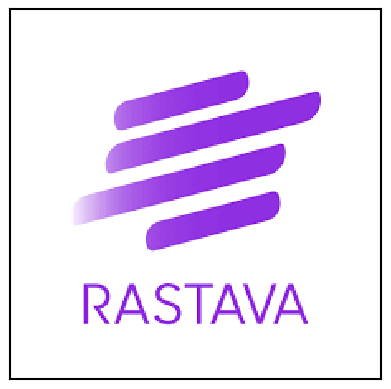

In [30]:
logo = plt.imread(LOGO_PATH)
ax = isns.imgplot(logo)
isns.set_scalebar(color='blue', scale_loc='bottom')

# waitKey() and destroyAll()
The waitKey function pauses the execution of the code until a key is pressed. This allows the user to view the image displayed by the cv2.imshow() function. The destroyAllWindows function closes all of the windows that were opened by OpenCV.